### 創造LOGISTIC REGRESSION 來預測缺席情形

In [1]:
import pandas as pd
import numpy as np

### Load the data

In [2]:
data_preprocessed=pd.read_csv('Absenteeism_preprocessed.csv')
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


### Create target
第一個，定義：什麼叫"遲到"，本題以"缺席時間平均"作為標準

In [3]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [4]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours']>data_preprocessed['Absenteeism Time in Hours'].median(),1,0)

In [5]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [6]:
data_preprocessed['Excessive Absenteeism']=targets

In [7]:
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


### A comment on the targets

In [8]:
#45-55 足夠拿來做logistic regression
targets.sum()/targets.shape[0]

0.45571428571428574

In [9]:
#跑過一輪發現有不重要的權重後回來這邊，將不重要的權重drop掉，其中包括
#Daily Work Load Average
#Distance to Work
#Day of the Week
data_with_targets=data_preprocessed.drop(['Absenteeism Time in Hours','Daily Work Load Average','Distance to Work','Day of the Week'],axis=1)

In [10]:
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## 將input 設定為 regression

In [11]:
data_with_targets.shape

(700, 12)

In [12]:
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
5,0,0,0,1,10,179,38,31,0,0,0
6,0,0,0,1,7,361,28,27,0,1,4
7,0,0,0,1,7,260,36,23,0,4,0
8,0,0,1,0,6,155,34,25,0,2,0
9,0,0,0,1,7,235,37,29,1,1,1


In [13]:
unscaled_inputs=data_with_targets.iloc[:,:-1]

### 標準化

In [14]:
from sklearn.preprocessing import StandardScaler

#這邊會有將dummy正規化的問題，需要客製化的正規化公式，先暫時不修正
absenteeism_scaler=StandardScaler()

In [15]:
absenteeism_scaler.fit(unscaled_inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_inputs=absenteeism_scaler.transform(unscaled_inputs)

In [17]:
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [18]:
scaled_inputs.shape

(700, 11)

## Split data into train & test and shuffle
設定相關的模組並切分

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split(scaled_inputs, targets)
#會自行shuffle，所以需要randomstate來定義

[array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927,  0.26848661],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          1.78021889, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035,  0.26848661],
        ...,
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          2.67996851, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.91902997, -0.58968976],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927,  0.26848661]]),
 array([[-0.57735027, -0.09298136,  3.17979734, ..., -0.44798003,
         -0.01928035,  2.8430157 ],
        [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
          0.88046927,  0.26848661],
        [ 1.73205081, -0.09298136, -0.31448545, ..., -0.44798003,
         -0.01928035,  1.12666297],
        ...,
        [-0.57735027, -0.09298136,  3.17979734, ..., -

In [21]:
x_train, x_test,y_train, y_test=train_test_split(scaled_inputs,targets, train_size=0.8,random_state=20)

C:\Users\E2118\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
print(x_train.shape, y_train.shape)

(560, 11) (560,)


In [23]:
print(x_test.shape, y_test.shape)

(140, 11) (140,)


## Modeling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Training model

In [25]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
reg.score(x_train,y_train)

0.7857142857142857

# Mannually check accuracy

In [27]:
model_outputs=reg.predict(x_train)
model_outputs
#會拿來和y_train相比

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [28]:
#將比對結果一一呈現
model_outputs == y_train

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [29]:
#分子是一一比對的正確對硬總數，分母則是資料總數
np.sum((model_outputs==y_train))/model_outputs.shape[0]

0.7857142857142857

## 要呈現了

In [30]:
print('回歸線節距=',reg.intercept_,'回歸線各項係數=',reg.coef_)

回歸線節距= [-0.21538857] 回歸線各項係數= [[ 2.0519056   0.32906839  1.55125846  1.29333371  0.01972144  0.71361098
  -0.20237792  0.33182253 -0.13971307  0.37825059 -0.31928302]]


In [31]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [32]:
feature_name=unscaled_inputs.columns.values

In [33]:
#轉至之後，把係數和column名稱寫在一起
summary_table=pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficient']=np.transpose(reg.coef_)
summary_table

,Feature name,Coefficient
0,Reason_1,2.051906
1,Reason_2,0.329068
2,Reason_3,1.551258
3,Reason_4,1.293334
4,Month Value,0.019721
5,Transportation Expense,0.713611
6,Age,-0.202378
7,Body Mass Index,0.331823
8,Education,-0.139713
9,Children,0.378251


In [34]:
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
#如果沒有再intercept的地方放[0]，後面exp時，該格子就不會被當作一個數字看待，因此出現error

In [35]:
summary_table=summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-0.215389
1,Reason_1,2.051906
2,Reason_2,0.329068
3,Reason_3,1.551258
4,Reason_4,1.293334
5,Month Value,0.019721
6,Transportation Expense,0.713611
7,Age,-0.202378
8,Body Mass Index,0.331823
9,Education,-0.139713


### 如何解讀一組模型，各項係數
coefficient 當係數越大(權重越大)，表示該feature越重要

In [36]:
summary_table['Odds_ratio']=np.exp(summary_table.Coefficient)
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-0.215389,0.806228
1,Reason_1,2.051906,7.782718
2,Reason_2,0.329068,1.389673
3,Reason_3,1.551258,4.717403
4,Reason_4,1.293334,3.644917
5,Month Value,0.019721,1.019917
6,Transportation Expense,0.713611,2.041349
7,Age,-0.202378,0.816786
8,Body Mass Index,0.331823,1.393506
9,Education,-0.139713,0.869608


In [37]:
summary_table.sort_values('Odds_ratio',ascending=False)

,Feature name,Coefficient,Odds_ratio
1,Reason_1,2.051906,7.782718
3,Reason_3,1.551258,4.717403
4,Reason_4,1.293334,3.644917
6,Transportation Expense,0.713611,2.041349
10,Children,0.378251,1.459729
8,Body Mass Index,0.331823,1.393506
2,Reason_2,0.329068,1.389673
5,Month Value,0.019721,1.019917
9,Education,-0.139713,0.869608
7,Age,-0.202378,0.816786


如果odds ratio在0或1左右，那該項權重並不是很重要
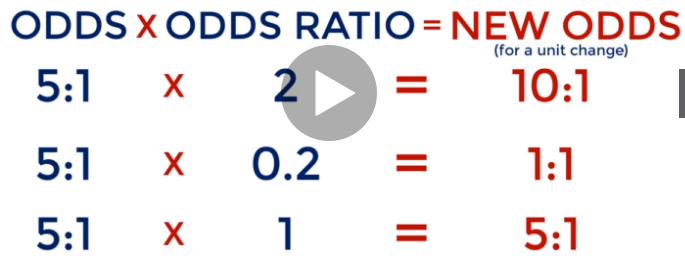
odds ratio 會導致輸入後便化成輸出的敏感度
如果在1附近表示並不重要

## 因此得知
* Daily Work Load Average, odds ratio = 0.971708
* Distance to Work, odds ratio = 0.940308
* Day of the Week, odds ratio = 0.917292
#### 這三項權重並不重要
##### 有reason1,2,3,4有大的odds ratio 表示當初切分是對的

### 快速回顧各原因實際上是什麼
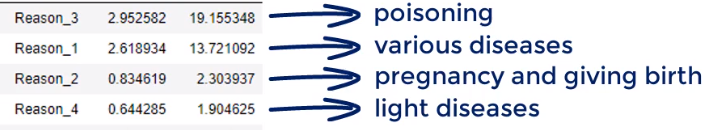
##### Transportation expense是因為經過正規化之後導致資料失真，從這裡知道，我們需要正規化適合的資料

## Backward elimination
 

## test model
來確認model有沒有overfitting(和train accuracy差距高於10%~20%以上時)

In [38]:
reg.score(x_test,y_test)

0.7285714285714285

In [40]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba
#左側表示每次測驗時，輸出為1(測驗成功)的機率
#右側表示每次測驗時，輸出為0(測驗失敗)的機率

array([[0.75380274, 0.24619726],
       [0.59489002, 0.40510998],
       [0.44574508, 0.55425492],
       [0.76139283, 0.23860717],
       [0.06674565, 0.93325435],
       [0.28061192, 0.71938808],
       [0.2899013 , 0.7100987 ],
       [0.07101324, 0.92898676],
       [0.74608688, 0.25391312],
       [0.75707542, 0.24292458],
       [0.47884481, 0.52115519],
       [0.15419649, 0.84580351],
       [0.03550479, 0.96449521],
       [0.72903749, 0.27096251],
       [0.22581884, 0.77418116],
       [0.50896277, 0.49103723],
       [0.47737146, 0.52262854],
       [0.48474166, 0.51525834],
       [0.36444689, 0.63555311],
       [0.03394847, 0.96605153],
       [0.74158652, 0.25841348],
       [0.76139283, 0.23860717],
       [0.47358641, 0.52641359],
       [0.46770208, 0.53229792],
       [0.15603144, 0.84396856],
       [0.74720386, 0.25279614],
       [0.48930673, 0.51069327],
       [0.89915135, 0.10084865],
       [0.16152701, 0.83847299],
       [0.76139283, 0.23860717],
       [0.

In [41]:
predicted_proba.shape

(140, 2)

In [42]:
predicted_proba[:,1]

array([0.24619726, 0.40510998, 0.55425492, 0.23860717, 0.93325435,
       0.71938808, 0.7100987 , 0.92898676, 0.25391312, 0.24292458,
       0.52115519, 0.84580351, 0.96449521, 0.27096251, 0.77418116,
       0.49103723, 0.52262854, 0.51525834, 0.63555311, 0.96605153,
       0.25841348, 0.23860717, 0.52641359, 0.53229792, 0.84396856,
       0.25279614, 0.51069327, 0.10084865, 0.83847299, 0.23860717,
       0.39943089, 0.73111564, 0.72765582, 0.5241015 , 0.23860717,
       0.63755126, 0.25503335, 0.84761633, 0.4558738 , 0.63088829,
       0.23753609, 0.47260488, 0.25057196, 0.1090109 , 0.83628198,
       0.68731911, 0.73543095, 0.24075927, 0.24655247, 0.23646833,
       0.48439198, 0.06604143, 0.71938808, 0.24110914, 0.84781185,
       0.40795918, 0.94715038, 0.25250256, 0.08085059, 0.08129048,
       0.71178155, 0.72295009, 0.25586067, 0.84781705, 0.23464309,
       0.24510308, 0.01201507, 0.25615682, 0.83952901, 0.27565341,
       0.24836085, 0.07856423, 0.91097039, 0.45294598, 0.63207

### 接下來需要
* 儲存模型 (事實上在這個案例就是儲存'reg')
* 創造出模組，供複製、轉移、使用
* 抓取新的資料，將其存到資料庫並使用Tableau進行視覺化

### Save the model

In [43]:
import pickle

In [44]:
with open('model','wb')as file:
    pickle.dump(reg,file)

In [45]:
#儲存scaler
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)